In [9]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('imudata_baru.xlsx')

# Clean the data
df_clean = df.copy()

# Convert columns 'ax' and 'ay' to numeric, handling errors
df_clean['ax'] = pd.to_numeric(df_clean['ax'], errors='coerce')
df_clean['ay'] = pd.to_numeric(df_clean['ay'], errors='coerce')

# Remove rows with NaN values introduced by the conversion
df_clean = df_clean.dropna()

# Save the cleaned data to a CSV file
df_clean.to_csv('cleaned_data.csv', index=False)

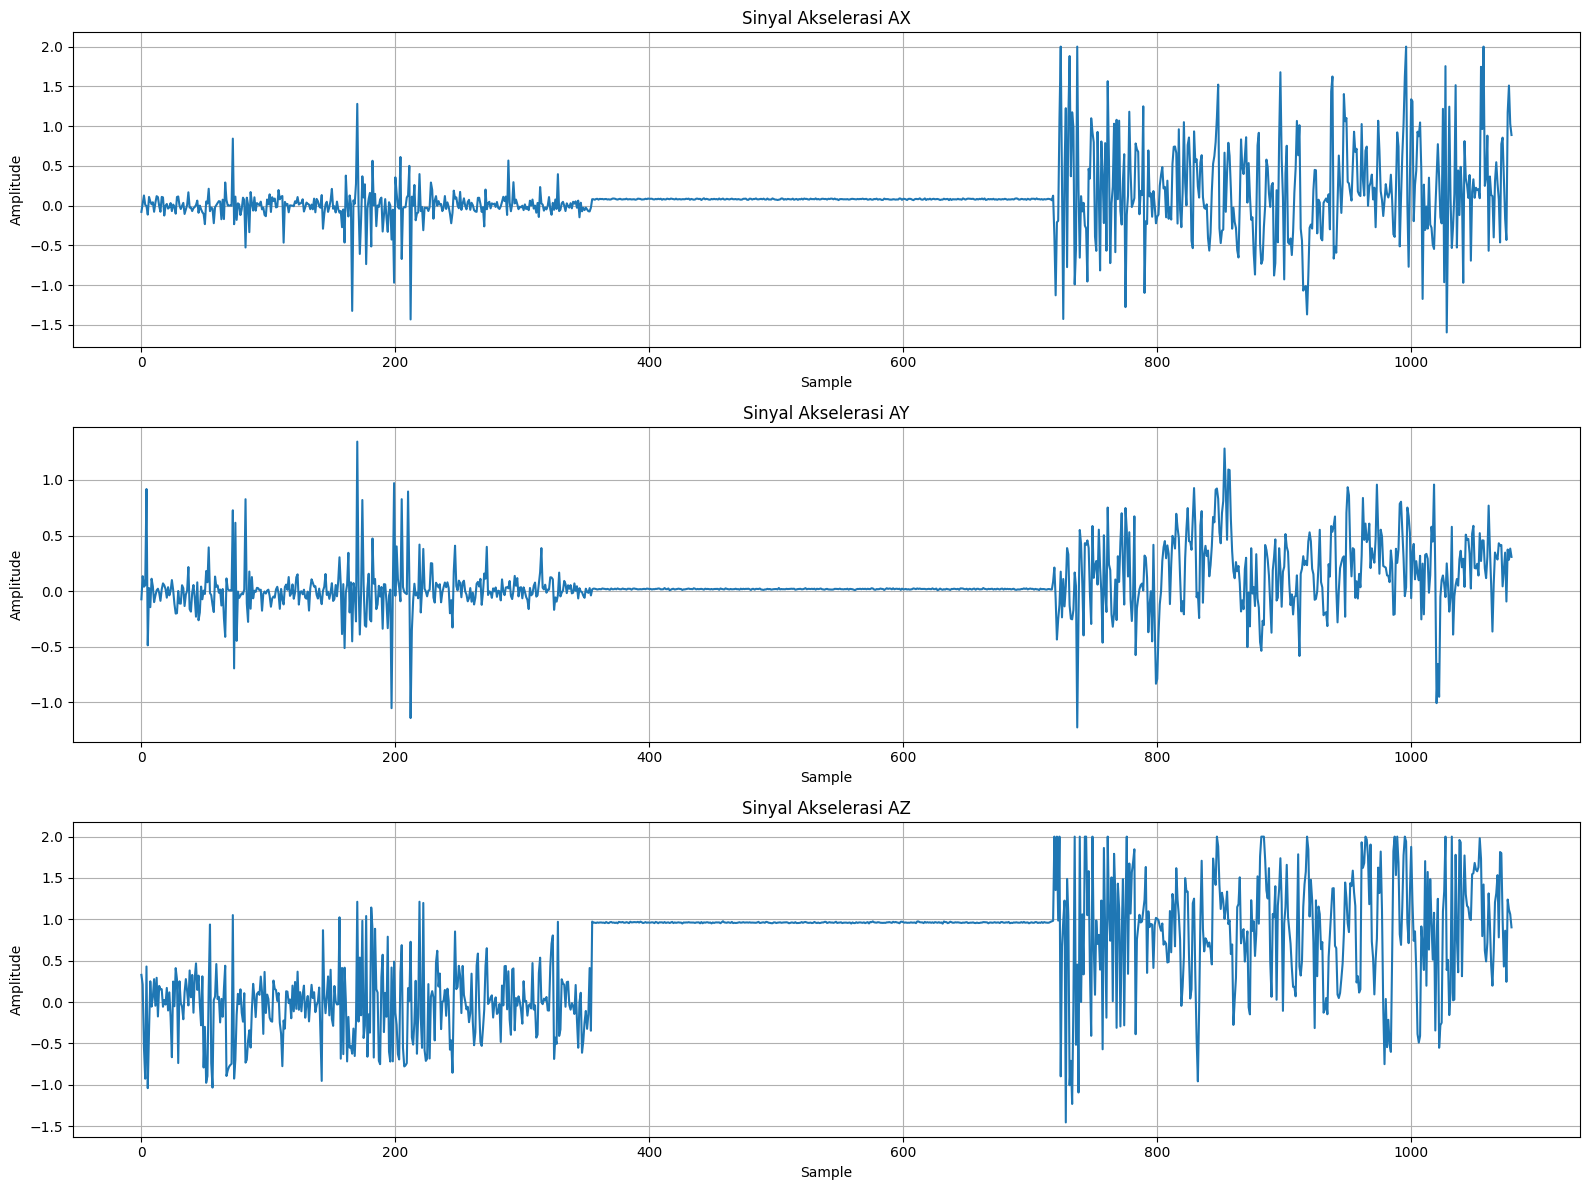

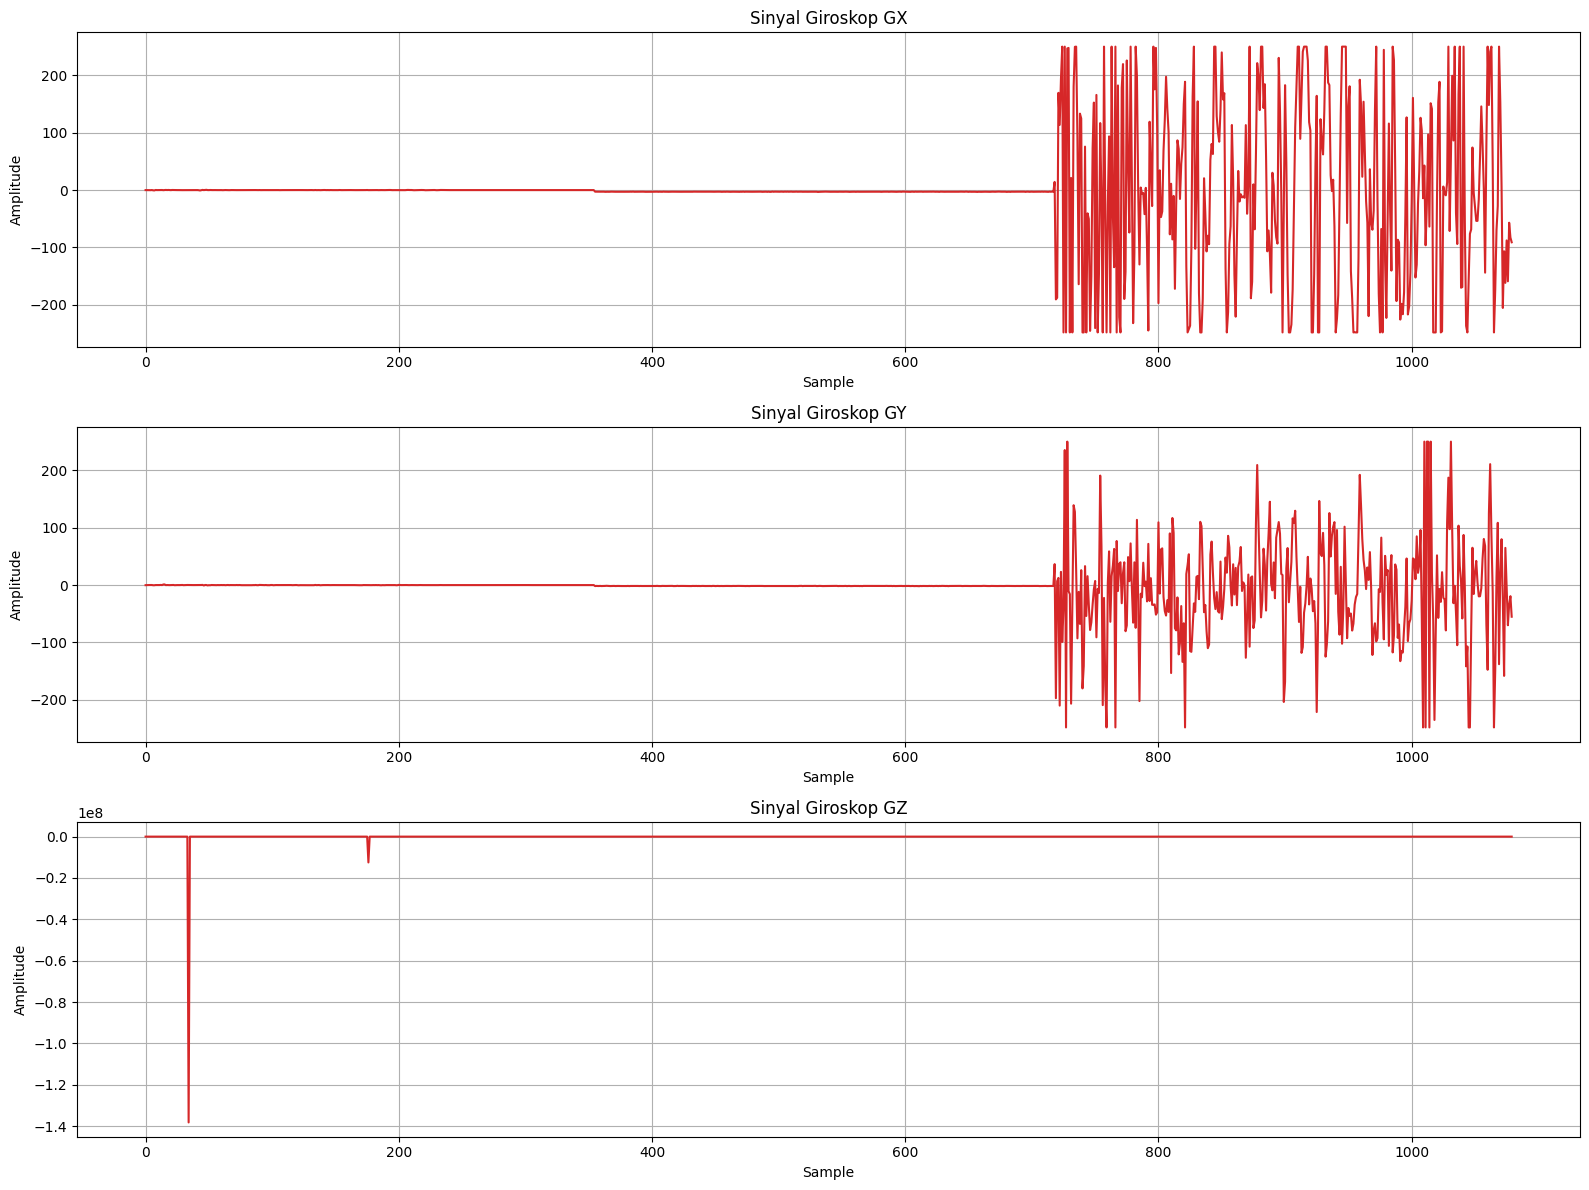

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('cleaned_data.csv')

# Cek kolom yang tersedia
sumbu_aksel = ['ax', 'ay', 'az']
sumbu_gyro = ['gx', 'gy', 'gz']
semua_sumbu = sumbu_aksel + sumbu_gyro

# Plot akselerometer
plt.figure(figsize=(16, 12))
for i, sumbu in enumerate(sumbu_aksel, 1):
    if sumbu in df.columns:
        plt.subplot(3, 1, i)
        plt.plot(df[sumbu], label=sumbu, color='tab:blue')
        plt.title(f'Sinyal Akselerasi {sumbu.upper()}')
        plt.xlabel('Sample')
        plt.ylabel('Amplitude')
        plt.grid(True)

plt.tight_layout()
plt.show()

# Plot giroskop
plt.figure(figsize=(16, 12))
for i, sumbu in enumerate(sumbu_gyro, 1):
    if sumbu in df.columns:
        plt.subplot(3, 1, i)
        plt.plot(df[sumbu], label=sumbu, color='tab:red')
        plt.title(f'Sinyal Giroskop {sumbu.upper()}')
        plt.xlabel('Sample')
        plt.ylabel('Amplitude')
        plt.grid(True)

plt.tight_layout()
plt.show()


/var/folders/lt/2mkl6ry53ll9fdk2br6skfgw0000gn/T/ipykernel_73393/2978021570.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


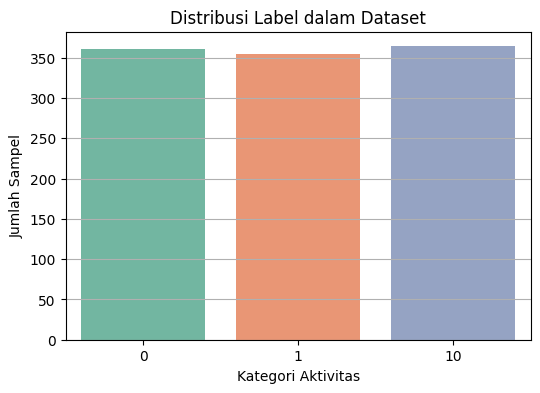

In [19]:
if 'label' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='label', data=df, palette='Set2')
    plt.title('Distribusi Label dalam Dataset')
    plt.xlabel('Kategori Aktivitas')
    plt.ylabel('Jumlah Sampel')
    plt.grid(axis='y')
    plt.show()
